## Initialization

In [2]:
# packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import string  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from tqdm import tnrange, tqdm_notebook
from itertools import combinations
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math

In [3]:
# set directories
inputpath=r'/Users/nadhif/Library/CloudStorage/OneDrive-HandelshögskolaniStockholm/PhD/Fall 2023/Applied Empirical Economics/Problem Set/Task4/Raw/Data'
outputpath=r'/Users/nadhif/Library/CloudStorage/OneDrive-HandelshögskolaniStockholm/PhD/Fall 2023/Applied Empirical Economics/Problem Set/Task4/Analysis/Results'

## Data Input 

In [4]:
# upload the raw dataset 
data1 = pd.read_csv(inputpath+'/growthdata92_02.csv',sep=",",
                  lineterminator='\r',
                  error_bad_lines=False)

data2 = pd.read_csv(inputpath+'/growthdata02_11.csv',sep=",",
                  lineterminator='\r',
                  error_bad_lines=False)

/var/folders/1q/w9k33ndn3r764dwmlxmm3z540000gn/T/ipykernel_59619/1614986813.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv(inputpath+'/growthdata92_02.csv',sep=",",
/var/folders/1q/w9k33ndn3r764dwmlxmm3z540000gn/T/ipykernel_59619/1614986813.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2 = pd.read_csv(inputpath+'/growthdata02_11.csv',sep=",",


In [5]:
# drop NaNs
data1.dropna(inplace = True)
data2.dropna(inplace = True)


In [6]:
# drop unnecessary variables
data1 = data1.drop(["iso3", "Unnamed: 0"], axis=1)
data2 = data2.drop(["iso3", "Unnamed: 0"], axis=1)

In [7]:
# split train and test datasets 
data1_train, data1_test = train_test_split(data1, test_size=0.2, random_state=2409)
data2_train, data2_test = train_test_split(data2, test_size=0.2, random_state=2409)

In [8]:
# specify in\dependent variables
y = data2_train['growth']
X = data2_train.drop(["growth"], axis=1)

X_test = data2_test.drop('growth',axis = 1)
y_test = data2_test['growth']


## Subset Selection

## Lasso

In [45]:
list_alpha = np.linspace(0,0.02,25)

X = data2_train.drop('growth',axis = 1)
y = data2_train['growth']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised
coeff_matrix = {}

for alpha in list_alpha:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X,y)
    coeff_matrix[alpha] = list(lasso.coef_)
    
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp.head()



/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e-02, tolerance: 6.017e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0.000000,-0.023846,0.001566,-0.000843,0.007104,0.004875,-0.003461,0.005360,0.014207,-0.013275,0.000838,...,0.000558,-0.007127,-0.000886,0.003543,0.002985,0.002685,-0.001288,-0.000482,0.002237,-0.005415
0.000833,-0.007060,0.000000,0.000000,0.005799,0.000090,-0.000000,0.004573,0.001175,-0.000000,0.000000,...,-0.000000,-0.004112,-0.005748,0.000384,-0.000000,0.000000,-0.000000,-0.001101,-0.000000,-0.005834
0.001667,-0.000000,0.000000,0.000000,0.005453,0.000000,0.000000,0.003611,0.000000,-0.000000,-0.000000,...,-0.000000,-0.002794,-0.006941,0.000000,-0.000000,0.000000,-0.000000,-0.000959,-0.000000,-0.006474
0.002500,-0.000000,0.000000,0.000000,0.005347,0.000000,0.000000,0.002826,0.000000,-0.000000,-0.000000,...,-0.000000,-0.002084,-0.006710,0.000000,-0.000034,0.000000,-0.000000,-0.000000,-0.000000,-0.005749
0.003333,-0.000000,0.000000,0.000000,0.005192,0.000000,0.000000,0.001919,0.000000,-0.000000,-0.000000,...,-0.000000,-0.000965,-0.006248,0.000000,-0.000976,-0.000000,-0.000000,-0.000000,-0.000000,-0.003936


In [10]:
print(list_alpha)

[0.         0.00083333 0.00166667 0.0025     0.00333333 0.00416667
 0.005      0.00583333 0.00666667 0.0075     0.00833333 0.00916667
 0.01       0.01083333 0.01166667 0.0125     0.01333333 0.01416667
 0.015      0.01583333 0.01666667 0.0175     0.01833333 0.01916667
 0.02      ]


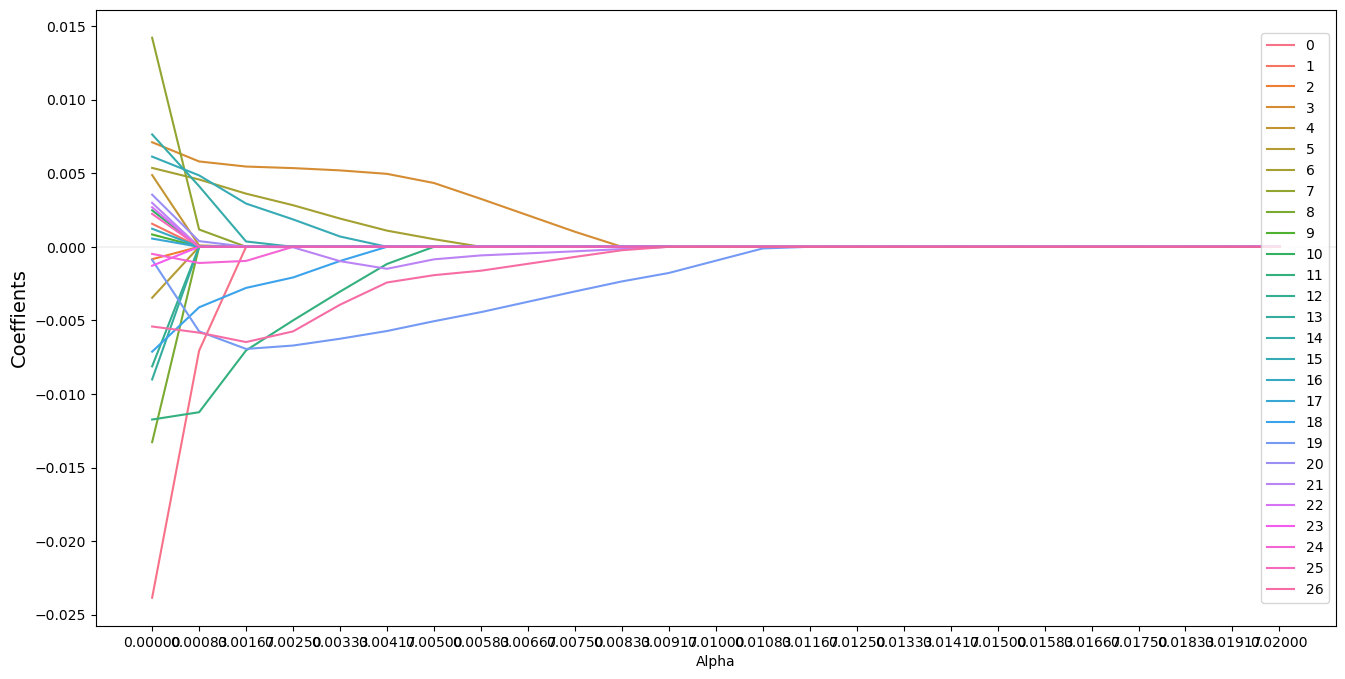

In [11]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
#plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [12]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[-0.0, 0.0, -0.0, 0.0021399438588945497, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.003737193498902433, 0.0, -0.00044654299606994904, -0.0, -0.0, -0.0, -0.0, -0.0011562902169073733]


In [13]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[20]])

[-0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


(0.0, 0.02)

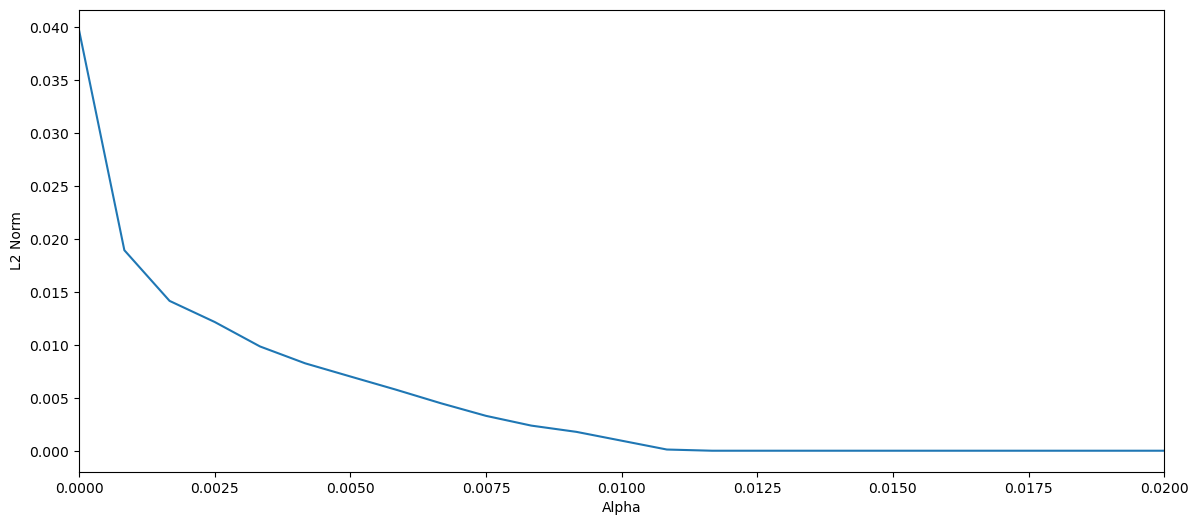

In [14]:
list_l2_norm = []
for alpha in list_alpha:
    list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,0.02)

In [15]:
# Cross validation for this model 
parameters = {'alpha':list_alpha}
lasso = Lasso()
lasso = GridSearchCV(lasso,parameters)
lasso.fit(data2_train.drop('growth',axis = 1),data2_train['growth'])


/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.995e-03, tolerance: 4.905e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.        , 0.00083333, 0.00166667, 0.0025    , 0.00333333,
       0.00416667, 0.005     , 0.00583333, 0.00666667, 0.0075    ,
       0.00833333, 0.00916667, 0.01      , 0.01083333, 0.01166667,
       0.0125    , 0.01333333, 0.01416667, 0.015     , 0.01583333,
       0.01666667, 0.0175    , 0.01833333, 0.01916667, 0.02      ])})

In [16]:
best_lasso = lasso.best_estimator_
best_lasso

Lasso(alpha=0.0016666666666666668)

In [17]:
best_lasso.coef_

array([-0.        ,  0.        ,  0.        ,  0.00687072,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.00775428, -0.        , -0.        ,  0.00072726,
        0.00262295,  0.        , -0.        , -0.        , -0.0078571 ,
        0.        , -0.00147764,  0.        , -0.        , -0.00250476,
       -0.        , -0.00532966])

In [18]:
pd.DataFrame({'Coefficients':list(best_lasso.coef_)},index = list(data2_train.drop('growth',axis = 1).columns))

,Coefficients
ln_y,-0.000000
hc,0.000000
gvmnt_c,0.000000
gcf,0.006871
ext_bal,0.000000
trade,0.000000
inflation,0.000000
fem_emp,0.000000
tot_emp,-0.000000
inf_mort,-0.000000


## Ridge Regression 

In [19]:
list_alpha = np.linspace(0,250,100)

X = data2_train.drop('growth',axis = 1)
y = data2_train['growth']

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised
coeff_matrix = {}

for alpha in list_alpha:
    ridge= Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff_matrix[alpha] = list(ridge.coef_)
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0.000000,-0.023846,0.001566,-0.000843,0.007104,0.004875,-0.003461,0.005360,0.014207,-0.013275,0.000838,...,0.000558,-0.007127,-0.000886,0.003543,0.002985,0.002685,-0.001288,-0.000482,0.002237,-0.005415
2.525253,-0.015263,0.002127,-0.000320,0.006735,0.002706,-0.002210,0.005060,0.008140,-0.006803,-0.000094,...,0.000279,-0.005817,-0.003041,0.002348,0.002063,0.002869,-0.002156,-0.002255,0.000201,-0.004433
5.050505,-0.011245,0.002286,-0.000183,0.006530,0.001885,-0.001653,0.004861,0.006285,-0.004884,-0.000355,...,0.000015,-0.004966,-0.003733,0.002021,0.001082,0.002872,-0.002404,-0.002674,-0.000616,-0.004158
7.575758,-0.008917,0.002340,-0.000125,0.006366,0.001448,-0.001306,0.004707,0.005273,-0.003897,-0.000500,...,-0.000181,-0.004400,-0.004011,0.001902,0.000399,0.002781,-0.002485,-0.002811,-0.001059,-0.003990
10.101010,-0.007398,0.002349,-0.000098,0.006219,0.001178,-0.001061,0.004577,0.004599,-0.003282,-0.000602,...,-0.000330,-0.003993,-0.004122,0.001856,-0.000085,0.002654,-0.002503,-0.002850,-0.001329,-0.003862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239.898990,-0.000536,0.000775,-0.000313,0.002132,0.000342,0.000316,0.001573,0.000056,-0.000580,-0.000617,...,-0.000762,-0.001092,-0.001791,0.001083,-0.001363,0.000016,-0.001166,-0.001290,-0.001198,-0.001536
242.424242,-0.000532,0.000769,-0.000312,0.002117,0.000341,0.000315,0.001562,0.000052,-0.000577,-0.000613,...,-0.000759,-0.001086,-0.001781,0.001078,-0.001357,0.000013,-0.001160,-0.001284,-0.001192,-0.001528
244.949495,-0.000528,0.000762,-0.000312,0.002102,0.000340,0.000314,0.001552,0.000048,-0.000574,-0.000609,...,-0.000756,-0.001080,-0.001771,0.001073,-0.001351,0.000009,-0.001154,-0.001277,-0.001187,-0.001520
247.474747,-0.000524,0.000756,-0.000311,0.002088,0.000339,0.000313,0.001541,0.000044,-0.000571,-0.000604,...,-0.000753,-0.001074,-0.001761,0.001068,-0.001345,0.000006,-0.001149,-0.001270,-0.001181,-0.001511


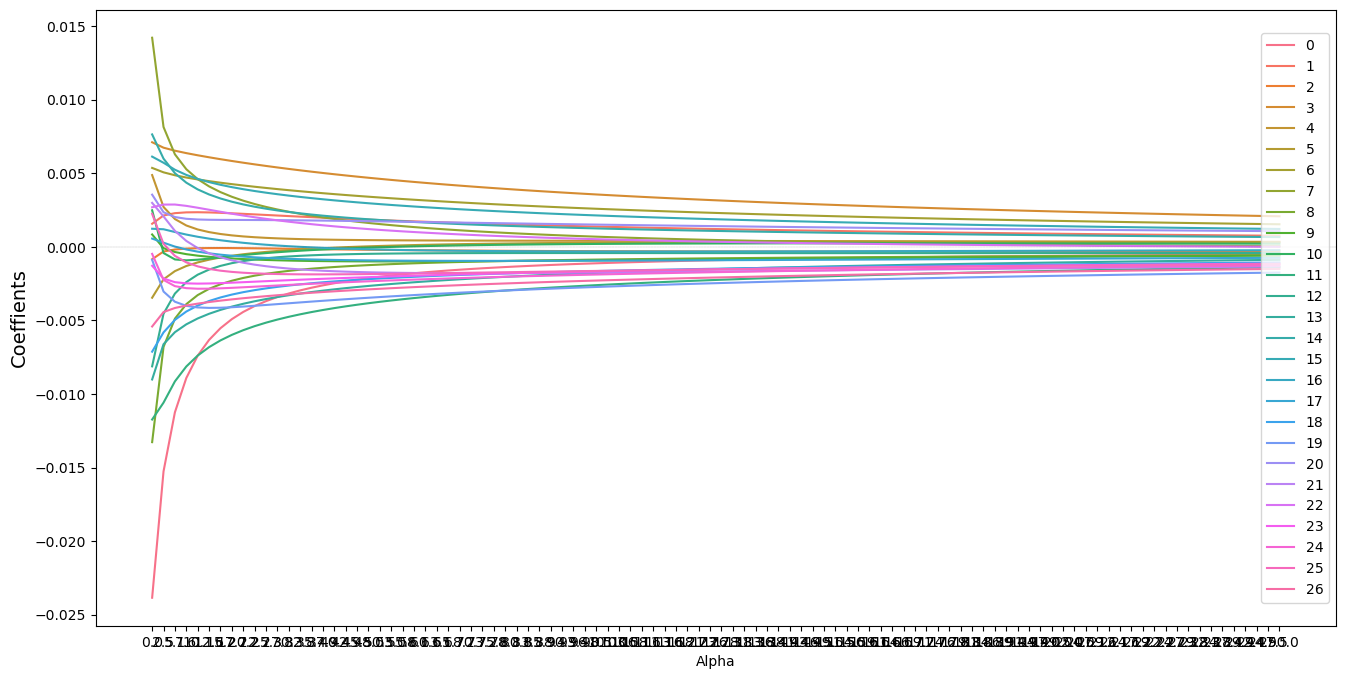

In [20]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
#plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [21]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[-0.004426150133082929, 0.002239787175456598, -9.55139591906563e-05, 0.0057140131227850595, 0.000704858820694338, -0.0005072929529455368, 0.004166932264882481, 0.0031344400938337633, -0.002116760239893065, -0.0008331712385996668, -0.0005627759761073372, -0.0056666307163857925, -0.0009712783577822271, -0.0038719554291521126, 0.0028795208024917137, 0.003914707899856003, 0.00027099530223063673, -0.0006665130401101493, -0.003083710560612368, -0.004061433952012467, 0.001822934813519809, -0.0010825059871246165, 0.002124116961027289, -0.0024054797246370256, -0.0027509036767245625, -0.0017629991512080132, -0.0034950856968758615]


In [22]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[20]])

[-0.0020356138226492724, 0.001815056421655973, -0.00020854878482803345, 0.004616844878132856, 0.00044701972682720855, 5.586551432932855e-05, 0.0033494988950841026, 0.0015426646981927387, -0.0012102600292657243, -0.0009948959645588729, -3.1863923224920764e-05, -0.0037380512649752167, -0.00046753428777430886, -0.0025918951491061652, 0.0018197161570306997, 0.0028994768064474568, -0.000187544410184815, -0.000931112601872545, -0.0021544606662862948, -0.0034149145459227144, 0.0017269543113365598, -0.0017473563648948492, 0.0011485474534253242, -0.0020377630305975086, -0.0023146857044073588, -0.0018453099169241582, -0.0028526692274347632]


(0.0, 250.0)

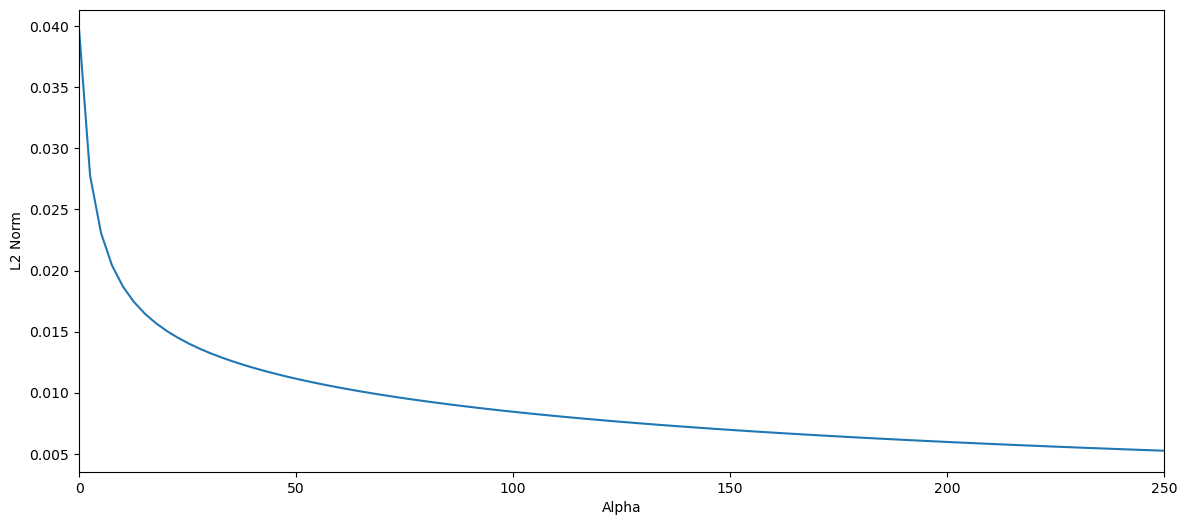

In [23]:
list_l2_norm = []
for alpha in list_alpha:
    list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,250)

In [24]:
# cross validation for this model
parameters = {'alpha':list_alpha}
ridge = Ridge()
ridge = GridSearchCV(ridge,parameters)
ridge.fit(data2_train.drop('growth',axis = 1),data2_train['growth'])


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([  0.        ,   2.52525253,   5.05050505,   7.57575758,
        10.1010101 ,  12.62626263,  15.15151515,  17.67676768,
        20.2020202 ,  22.72727273,  25.25252525,  27.77777778,
        30.3030303 ,  32.82828283,  35.35353535,  37.87878788,
        40.4040404 ,  42.92929293,  45.45454545,  47.97979798,
        50.50505051,  53.03030303,  55.55555556,  58.08080808,
        60.60606061,  63.13131...
       181.81818182, 184.34343434, 186.86868687, 189.39393939,
       191.91919192, 194.44444444, 196.96969697, 199.49494949,
       202.02020202, 204.54545455, 207.07070707, 209.5959596 ,
       212.12121212, 214.64646465, 217.17171717, 219.6969697 ,
       222.22222222, 224.74747475, 227.27272727, 229.7979798 ,
       232.32323232, 234.84848485, 237.37373737, 239.8989899 ,
       242.42424242, 244.94949495, 247.47474747, 250.        ])})

In [25]:
best_ridge = ridge.best_estimator_
best_ridge

Ridge(alpha=20.2020202020202)

In [26]:
best_ridge.coef_

array([-0.00380052,  0.00215216,  0.00042994,  0.00693062,  0.00153303,
       -0.00056663,  0.00072376,  0.00303306, -0.00192298, -0.00140905,
       -0.00036337, -0.00585614, -0.00146744, -0.00405142,  0.0029952 ,
        0.00334241,  0.00070464, -0.00014045, -0.00023081, -0.00479818,
        0.00211654, -0.00289818,  0.00252532, -0.00227843, -0.00387835,
       -0.00151218, -0.00362661])

In [27]:
pd.DataFrame({'Coefficients':list(best_ridge.coef_)},index = list(data2_train.drop('growth',axis = 1).columns))

,Coefficients
ln_y,-0.003801
hc,0.002152
gvmnt_c,0.000430
gcf,0.006931
ext_bal,0.001533
trade,-0.000567
inflation,0.000724
fem_emp,0.003033
tot_emp,-0.001923
inf_mort,-0.001409


In [28]:
X = data2_train.drop('growth',axis = 1)
y = data2_train['growth']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#applying pca
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [29]:
print('Shape of data returned by pca is ',X_pca.shape)

Shape of data returned by pca is  (89, 27)


In [30]:
print('Total number of components are - ',len(pca.components_))

Total number of components are -  27


In [31]:
pca.explained_variance_ratio_*100

array([4.51576558e+01, 1.02549264e+01, 8.19274576e+00, 5.88210645e+00,
       4.79728757e+00, 4.39934588e+00, 3.24647084e+00, 3.09986881e+00,
       2.97435529e+00, 2.57714456e+00, 2.10399915e+00, 1.49405870e+00,
       1.26541181e+00, 9.40796548e-01, 6.94738334e-01, 5.94126726e-01,
       5.13713508e-01, 4.61556922e-01, 3.09156079e-01, 2.56987567e-01,
       2.08747630e-01, 1.76961780e-01, 1.23515244e-01, 9.82079024e-02,
       7.66926629e-02, 6.30188520e-02, 3.64032265e-02])

In [32]:
np.round(pca.explained_variance_ratio_*100,1)

array([45.2, 10.3,  8.2,  5.9,  4.8,  4.4,  3.2,  3.1,  3. ,  2.6,  2.1,
        1.5,  1.3,  0.9,  0.7,  0.6,  0.5,  0.5,  0.3,  0.3,  0.2,  0.2,
        0.1,  0.1,  0.1,  0.1,  0. ])

In [33]:
def pcr(X,y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    num_components = X.shape[1]
    scores = []
    variability_explained = []
    
    for n_component in range(1,num_components+1):
        pca = PCA(n_components=n_component)
        X_pca = pca.fit_transform(X_scaled)
        
        lr = LinearRegression()
        scores.append(-np.mean(cross_val_score(lr,X_pca,y,cv = 10,scoring = 'neg_mean_squared_error')))
        variability_explained.append(np.sum(np.round(pca.explained_variance_ratio_*100,1)))
        
    return scores,variability_explained    



Text(0.5, 1.0, '% explained by num of components')

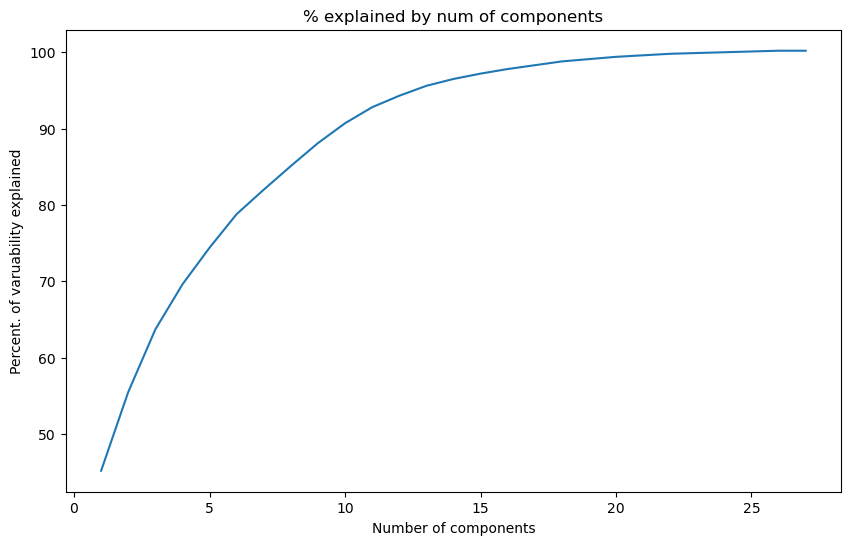

In [34]:
scores,var_explained = pcr(X,y) 
num_components = np.arange(1,X.shape[1]+1)
# Lets see the variability explained as function of the num_of_components
plt.figure(figsize = (10,6))
plt.plot(num_components,var_explained)
plt.xlabel('Number of components')
plt.ylabel('Percent. of varuability explained')
plt.title('% explained by num of components')

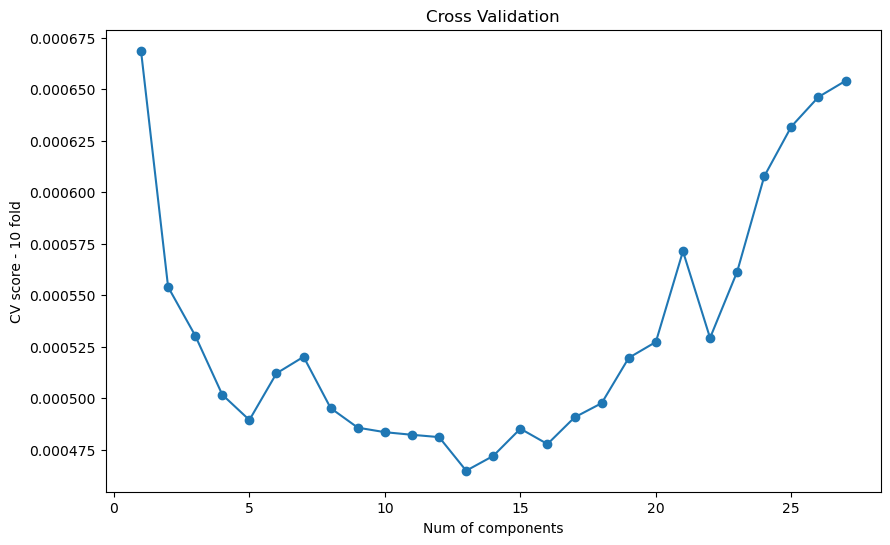

In [35]:
plt.figure(figsize = (10,6))
plt.plot(num_components,scores,marker = 'o')
plt.xlabel('Num of components')
plt.ylabel('CV score - 10 fold')
plt.title('Cross Validation')
plt.xticks = num_components

mean growth  

In [36]:
actual = y.mean()
actual = [actual] * 23
predicted = y_test
mse = np.square(np.subtract(actual,predicted)).mean()  
rmse = math.sqrt(mse) 

kitchen sink 

In [37]:
X = data2_train.drop('growth',axis = 1)
y = data2_train['growth']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

[-0.02355887  0.00156473 -0.00098347  0.0096439   0.00654556 -0.00483744
  0.13000659  0.01443035 -0.01305899  0.00090086  0.00242901 -0.01206346
 -0.00785309 -0.00927336  0.00815499  0.00649202  0.00132222  0.02613872
 -0.30534086 -0.00092138  0.00363947  0.00302609  0.00260369 -0.00130781
 -0.00048719  0.00227772 -0.00549614]
0.07407545787070308


,Coeff
ln_y,-0.023559
hc,0.001565
gvmnt_c,-0.000983
gcf,0.009644
ext_bal,0.006546
trade,-0.004837
inflation,0.130007
fem_emp,0.014430
tot_emp,-0.013059
inf_mort,0.000901


## RMSE Model Comparison

In [38]:
X_test = data2_test.drop('growth',axis = 1)
y_test = data2_test['growth']

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

print(X_test)

[[-5.73060764e-01  2.07782825e-01 -8.11418679e-01  5.01853159e-01
  -2.99739589e-01 -7.22121712e-02 -1.20668211e-01  3.63512556e-01
   5.46687885e-01 -3.86497021e-02 -2.96316385e-01  7.61875072e-01
  -9.08365241e-01  6.26355251e-01 -3.79904637e-01 -6.56254651e-01
  -3.87298335e-01  4.42718872e-01  5.01940248e-01 -1.24721913e+00
   1.36930639e+00  6.61143037e-03 -1.20682263e+00 -3.78187260e-01
  -3.75482695e-01 -6.08080598e-01 -6.25332573e-01]
 [-1.11582688e+00 -1.28874618e+00 -5.44521764e-01 -2.80990045e-01
   5.72914384e-01 -4.93282398e-01 -7.51212678e-01 -1.93087849e+00
  -1.21949528e+00 -4.30077344e-01  3.97343616e-01  7.73099109e-01
  -8.66626529e-01  9.11122391e-01 -1.87712584e-01 -6.56254651e-01
   2.58198890e+00  4.42718872e-01 -2.06353213e+00 -1.24721913e+00
   1.36930639e+00 -1.74007730e+00  2.31644627e-02 -1.11189269e+00
  -1.39011478e+00 -6.03775420e-01 -4.37534147e-01]
 [ 1.07780056e+00  1.18842516e+00  3.99013601e-01  1.22420780e-01
   2.45050058e-01 -1.08402907e+00 -7.794

In [39]:
# predictions for all models 

#predictions1 = mean.predict(X_test)

predictions2 = model.predict(X_test)

predictions3 = best_lasso.predict(X_test)

predictions4 = best_ridge.predict(X_test)

X = pca.fit_transform(X)
X_test = pca.transform(X_test)[:,0:5]
lm = LinearRegression()
pcr = lm.fit(X[:,0:5], y)
predictions5 = pcr.predict(X_test)



/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [40]:
# RMSE for all models 
rmse

0.025524179657237096

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, predictions2))

0.31645556887256915

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, predictions3))


0.024738021931748715

In [43]:
np.sqrt(metrics.mean_squared_error(y_test, predictions4))


0.02444058580016344

In [44]:
np.sqrt(metrics.mean_squared_error(y_test, predictions5))

0.0238554769838908